In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
N = 1000
N_six = 10
P_six = 1/6.

N_six = np.arange(1,1000)
K_six = (N-N_six)*P_six/(N_six*(1-P_six))


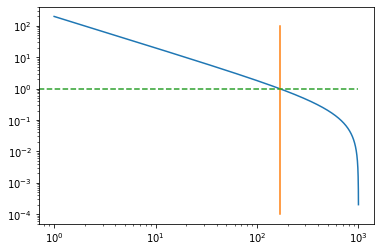

In [4]:
plt.plot(N_six,K_six)
plt.xscale("log")
plt.yscale("log")

plt.plot((1/6.*1000,1/6.*1000),(0.0001,100))
plt.plot((0,1000),(1,1),'--')

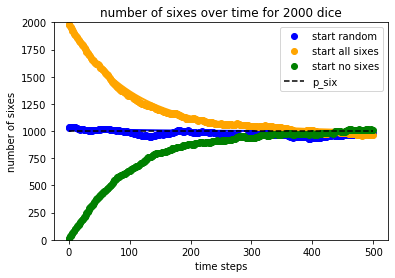

In [143]:
# Control parameters. Not
NUM_DICE = 2000
ALPHA = 0.01    # 0.05 <- for 20
NUM_STEPS = 500 #100 <- for 20
P_SIX = 0.5

# Figure out how many dice to flip at each step
num_to_flip = int(round(ALPHA*NUM_DICE,0))

# Figure out the weight on our dice, assuming that 
# p_1 == p_2 == p_3 == p_4 == p_5.  
# P_SIX + Sum(p_1 through p_5) = 1 
p_not_six = 1 - P_SIX
p_each_nonsix = p_not_six/5
dice_weights = [p_each_nonsix,p_each_nonsix,
                p_each_nonsix,p_each_nonsix,
                p_each_nonsix,P_SIX]

# Create three collections of NUM_DICE dice. One set has
# 1-6 (random dice), one set has only six (start_at_six), 
# one set has 1-5 (start_no_six)
random_dice = np.random.choice([1,2,3,4,5,6],NUM_DICE,p=dice_weights)
start_at_six = np.random.choice([6],NUM_DICE)
start_no_six = np.random.choice([1,2,3,4,5],NUM_DICE)

steps = np.arange(NUM_STEPS)
random_rate_law = P_SIX*NUM_DICE*(1-np.exp(-ALPHA*steps)) + np.sum(random_dice==6)*np.exp(-ALPHA*steps)
start_at_six_rate_law = P_SIX*NUM_DICE*(1-np.exp(-ALPHA*steps)) + np.sum(start_at_six==6)*np.exp(-ALPHA*steps)
start_no_six_rate_law = P_SIX*NUM_DICE*(1-np.exp(-ALPHA*steps)) + np.sum(start_no_six==6)*np.exp(-ALPHA*steps)

# These lists will hold the number of sixes in each of
# the collections at each time step
num_random_sixes = []
num_start_at_six_sixes = []
num_start_no_six_sixes = []

for i in range(NUM_STEPS):

    # Flip random dice collection
    dice_to_flip = np.random.choice(np.arange(NUM_DICE,dtype=np.int),num_to_flip,replace=False)
    new_dice = np.random.choice([1,2,3,4,5,6,],num_to_flip,p=dice_weights)
    random_dice[dice_to_flip] = new_dice
    num_random_sixes.append(np.sum(random_dice==6))

    # Flip start_at_six dice collection
    dice_to_flip = np.random.choice(np.arange(NUM_DICE,dtype=np.int),num_to_flip,replace=False)
    new_dice = np.random.choice([1,2,3,4,5,6,],num_to_flip,p=dice_weights)
    start_at_six[dice_to_flip] = new_dice
    num_start_at_six_sixes.append(np.sum(start_at_six==6))

    # Flip start_no_six dice collection
    dice_to_flip = np.random.choice(np.arange(NUM_DICE,dtype=np.int),num_to_flip,replace=False)
    new_dice = np.random.choice([1,2,3,4,5,6,],num_to_flip,p=dice_weights)
    start_no_six[dice_to_flip] = new_dice
    num_start_no_six_sixes.append(np.sum(start_no_six==6))



   
    
# HACK FOR 20
#steps = steps*0.05/0.01

plt.plot(steps,random_rate_law,color="blue",linewidth=2)
plt.plot(steps,start_at_six_rate_law,color="orange",linewidth=2)
plt.plot(steps,start_no_six_rate_law,color="green",linewidth=2)
    
plt.plot(steps,num_random_sixes,"o",label="start random",color="blue")
plt.plot(steps,num_start_at_six_sixes,"o",label="start all sixes",color="orange")
plt.plot(steps,num_start_no_six_sixes,"o",label="start no sixes",color="green")
    
plt.plot((0,NUM_STEPS),(P_SIX*NUM_DICE,P_SIX*NUM_DICE),'k--',label="p_six")
plt.ylim(0,NUM_DICE)
plt.xlabel("time steps")
plt.ylabel("number of sixes")
plt.title("number of sixes over time for {} dice".format(NUM_DICE))

plt.legend()


plt.savefig("{}_rolls_p0.5.pdf".format(NUM_DICE))




